In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/diabetes.csv', nrows=400)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               400 non-null    int64  
 1   Glucose                   400 non-null    int64  
 2   BloodPressure             400 non-null    int64  
 3   SkinThickness             400 non-null    int64  
 4   Insulin                   400 non-null    int64  
 5   BMI                       400 non-null    float64
 6   DiabetesPedigreeFunction  400 non-null    float64
 7   Age                       400 non-null    int64  
 8   Outcome                   400 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 28.2 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,400.000000,400.00000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,3.952500,121.24000,69.060000,20.327500,81.250000,32.10775,0.487915,33.092500,0.380000
std,3.369514,32.68437,19.011575,15.599796,121.597254,8.13714,0.349619,11.325396,0.485994
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.078000,21.000000,0.000000
25%,1.000000,100.00000,64.000000,0.000000,0.000000,27.30000,0.250500,24.000000,0.000000
50%,3.000000,116.50000,71.000000,23.000000,36.000000,32.00000,0.381000,29.000000,0.000000
75%,6.000000,143.00000,80.000000,32.000000,128.250000,36.60000,0.652500,40.000000,1.000000
max,17.000000,197.00000,122.000000,60.000000,846.000000,67.10000,2.329000,69.000000,1.000000


In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [8]:
X.shape, y.shape

((400, 8), (400,))

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [12]:
dtc = DecisionTreeClassifier(random_state=1)

In [13]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [14]:
y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

In [15]:
f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test)

(1.0, 0.6363636363636364)

Есть вероятность переобучение модели, показатель на трейновом равен 100%, когда на тестовой всего 67%.

In [16]:
from sklearn.model_selection import cross_validate

In [17]:
cv_results = cross_validate(dtc, X, y, cv=5, scoring='f1', return_train_score=False)

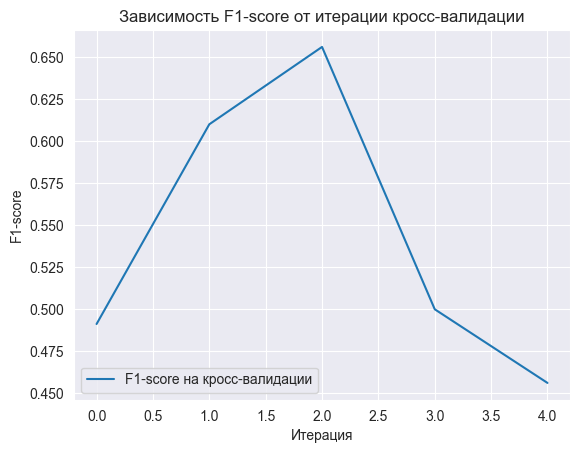

In [18]:
plt.plot(cv_results['test_score'], label='F1-score на кросс-валидации')
plt.xlabel('Итерация')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от итерации кросс-валидации')
plt.legend()
plt.show()

In [19]:
dtc_regularized = DecisionTreeClassifier(random_state=1, max_depth=3)

In [20]:
dtc_regularized.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [21]:
y_train_pred_regularized = dtc_regularized.predict(X_train)
y_test_pred_regularized = dtc_regularized.predict(X_test)

In [22]:
f1_score(y_train, y_train_pred_regularized), f1_score(y_test, y_test_pred_regularized)

(0.5058823529411764, 0.4782608695652174)

In [23]:
cv_results_regularized = cross_validate(dtc_regularized, X, y, cv=5, scoring='f1', return_train_score=False)

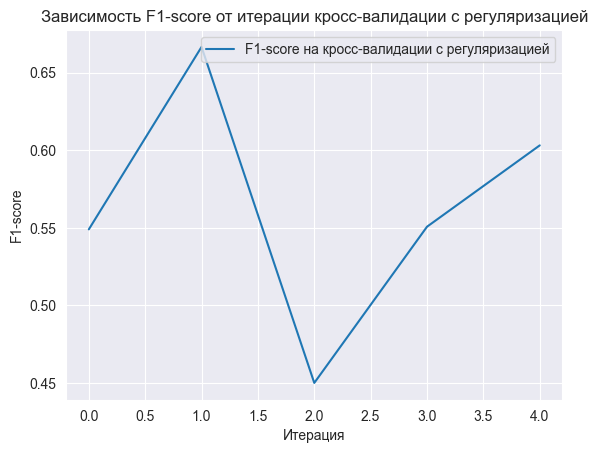

In [24]:
plt.plot(cv_results_regularized['test_score'], label='F1-score на кросс-валидации с регуляризацией')
plt.xlabel('Итерация')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от итерации кросс-валидации с регуляризацией')
plt.legend()
plt.show()

In [25]:
df_full = pd.read_csv('data/diabetes.csv')

In [26]:
X_full = df_full.drop(columns=['Outcome'])
y_full = df_full['Outcome']

In [27]:
dtc_full = DecisionTreeClassifier(random_state=1, max_depth=3)

In [28]:
dtc_full.fit(X_full, y_full)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [29]:
y_pred_test_full = dtc_full.predict(X_full)

In [30]:
f1_score(y_full, y_pred_test_full)

0.6653696498054474